# Importing Libraries

In [84]:

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
data=pd.read_csv('Admission_Predict.csv')
df=pd.DataFrame(data)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [86]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Check for Categorical Data

In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 0 categorical variables

The categorical variables are :

 []


# Check for Missing Values

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [92]:
count=df.iloc[:,-1].value_counts()
# count

# Correlation

<AxesSubplot:>

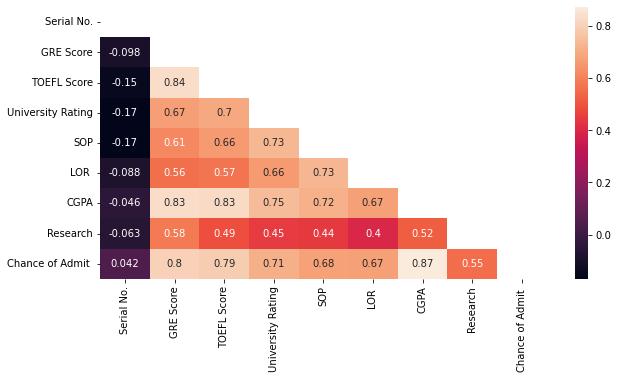

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
col=df.columns
fig,ax=plt.subplots(figsize=(10,5))
corr=df[col].corr()
sns.heatmap(corr,annot=True,mask=np.triu(np.ones_like(corr,dtype=bool)))

In [10]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


# Target Variable

In [93]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

# Splitting Data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
336,337,319,110,3,3.0,2.5,8.79,0
64,65,325,111,3,3.0,3.5,8.70,0
55,56,320,103,3,3.0,3.0,7.70,0
106,107,329,111,4,4.5,4.5,9.18,1
300,301,309,106,2,2.5,2.5,8.00,0
...,...,...,...,...,...,...,...,...
323,324,305,102,2,2.0,2.5,8.18,0
192,193,322,114,5,4.5,4.0,8.94,1
117,118,290,104,4,2.0,2.5,7.46,0
47,48,339,119,5,4.5,4.0,9.70,0


In [13]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
14,15,311,104,3,3.5,2.0,8.20,1
363,364,306,103,2,2.5,3.0,8.36,0
304,305,313,106,2,2.5,2.0,8.43,0
361,362,334,116,4,4.0,3.5,9.54,1


In [14]:
y_train

336    0.72
64     0.52
55     0.64
106    0.87
300    0.62
       ... 
323    0.62
192    0.86
117    0.45
47     0.89
172    0.86
Name: Chance of Admit , Length: 320, dtype: float64

In [15]:
y_test

132    0.71
309    0.70
341    0.79
196    0.73
246    0.72
       ... 
14     0.61
363    0.69
304    0.62
361    0.93
329    0.43
Name: Chance of Admit , Length: 80, dtype: float64

In [68]:
all_metrics=['Regression','MSE','RMSE','R2']
summary=[]

# Lasso Regression

In [69]:
name='Lasso'
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)
y_pred_lasso = lasso_reg.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_lasso)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
r2=r2_score(y_test,y_pred_lasso)
print("R2 :",r2)

MSE : 0.018300454101562502
RMSE : 0.13527917098194572
R2 : -0.0073191050460172935


# Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV
alpha=[1,0.1,0.01,0.001,0.0001]
param_grid=dict(alpha=alpha)
cv=GridSearchCV(estimator=lasso_reg,param_grid=param_grid,scoring='r2',verbose=1)
cv_result=cv.fit(x_train,y_train)
print("Best Score :",cv_result.best_score_)
print("Optimal Learning Rate :",cv_result.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score : 0.8174698463132634
Optimal Learning Rate : {'alpha': 0.0001}


In [71]:
lasso_reg1=linear_model.Lasso(alpha=0.0001)
lasso_reg1.fit(x_train,y_train)
y_pred_lasso1 = lasso_reg1.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_lasso1)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
r2=r2_score(y_test,y_pred_lasso)
print("R2 :",r2)
summary.append([name,mse,rmse,r2])

MSE : 0.004363534605680688
RMSE : 0.06605705568431497
R2 : -0.0073191050460172935


In [95]:
y_pred_lasso1

array([0.69248863, 0.71641068, 0.79961683, 0.61414503, 0.72396198,
       0.57757922, 0.69854768, 0.65376503, 0.86013677, 0.92188296,
       0.5069094 , 0.8774854 , 0.69679481, 0.48109587, 0.82558075,
       0.59549636, 0.63648914, 0.79871241, 0.58629372, 0.73092045,
       0.87879199, 0.8564732 , 0.64810932, 0.47754236, 0.78628006,
       0.60297593, 0.48126932, 0.61698352, 0.91080019, 0.63720429,
       0.62987227, 0.75595068, 0.76843385, 0.5558714 , 0.76484414,
       0.75232102, 0.63996787, 0.85721455, 0.62591153, 0.96165105,
       0.71264697, 0.68593653, 0.6825164 , 0.77626193, 0.84300863,
       0.63948264, 0.59246734, 0.70957984, 0.59783902, 0.60030165,
       0.67353732, 0.78529419, 0.65917558, 0.88265858, 0.73340739,
       0.77009479, 0.70374123, 0.7053033 , 0.74065772, 0.81263768,
       0.74418599, 0.47550956, 0.59992646, 0.54473879, 0.84339826,
       0.84150049, 0.7229683 , 0.84410946, 0.75655041, 0.7637281 ,
       0.56733111, 0.84415455, 0.79916165, 0.58829877, 0.91474

In [72]:
labels=['Model','MSE','RMSE','R2']
pd.DataFrame([['Lasso Regression',mse,rmse,r2]],columns=labels)

,Model,MSE,RMSE,R2
0,Lasso Regression,0.004364,0.066057,-0.007319


# Comparison 

# Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred= reg.predict(x_test)
print("Cofficient :",reg.coef_)
print("Intercept :",reg.intercept_)
print("Test Score",reg.score(x_test,y_test))
print("Train Score :",reg.score(x_train,y_train))
mean_squared_error = np.mean((y_pred - y_test)**2)
print(mean_squared_error)

Cofficient : [ 0.0001531   0.00202242  0.00273325  0.0098671  -0.00075995  0.01967423
  0.11250958  0.02385384]
Intercept : -1.3181528289408715
Test Score 0.7594824470194687
Train Score : 0.8308145815615404
0.004369598885687038


In [74]:
name1='Linear'
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
r2=r2_score(y_test,y_pred)
print("R2 :",r2)
summary.append([name1,mse,rmse,r2])

MSE : 0.004369598885687038
RMSE : 0.0661029415811962
R2 : 0.7594824470194687


In [75]:
labels=['Model','MSE','RMSE','R2']
pd.DataFrame([['Simple Linear Regression',mse,rmse,r2]],columns=labels)

,Model,MSE,RMSE,R2
0,Simple Linear Regression,0.00437,0.066103,0.759482


# Elastic Net

In [76]:
name2='Elastic Net'
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
y_pred_elastic = e_net.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_elastic)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
r2=r2_score(y_test,y_pred_elastic)
print("R2 :",r2)
summary.append([name2,mse,rmse,r2])

MSE : 0.008874715462533312
RMSE : 0.09420570822690795
R2 : 0.511505540373786


# Ridge Regression

In [77]:
name3='Ridge'
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)
print("Test Score :",ridge_reg.score(x_test,y_test))
print("Train Score :",ridge_reg.score(x_train,y_train))
y_predict_ridge_reg = ridge_reg.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_predict_ridge_reg)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
r2=r2_score(y_test,y_predict_ridge_reg)
print("R2 :",r2)
summary.append([name3,mse,rmse,r2])

Test Score : 0.7512114423970533
Train Score : 0.8106459272728395
MSE : 0.004519862232930322
RMSE : 0.0672299206672916
R2 : 0.7512114423970533


# Summary

In [78]:
summary=pd.DataFrame(summary,columns=all_metrics)
summary

,Regression,MSE,RMSE,R2
0,Lasso,0.004364,0.066057,-0.007319
1,Linear,0.004370,0.066103,0.759482
2,Elastic Net,0.008875,0.094206,0.511506
3,Ridge,0.004520,0.067230,0.751211


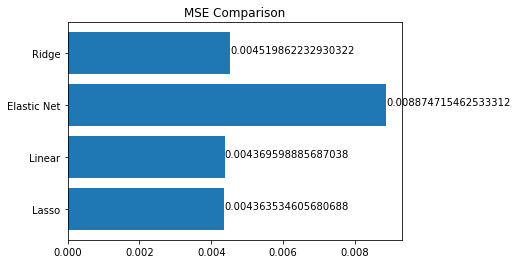

In [80]:
plt.barh(summary.iloc[:,0],summary.iloc[:,1])
plt.title('MSE Comparison')
for i,value in enumerate(summary.iloc[:,1]):
    plt.text(value,i,str(value))
plt.show()

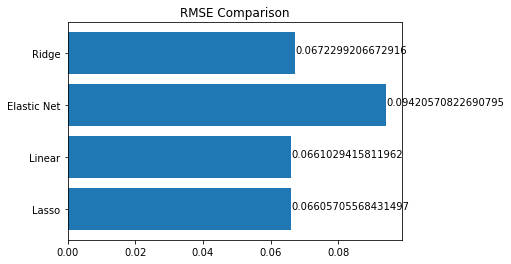

In [82]:
plt.barh(summary.iloc[:,0],summary.iloc[:,2])
plt.title('RMSE Comparison')
for i,value in enumerate(summary.iloc[:,2]):
    plt.text(value,i,str(value))
plt.show()

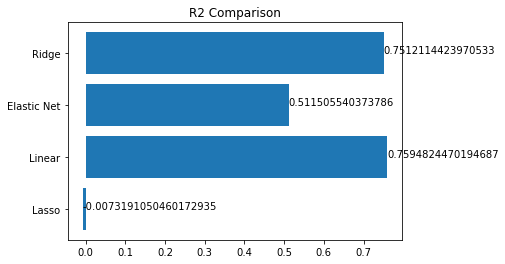

In [83]:
plt.barh(summary.iloc[:,0],summary.iloc[:,3])
plt.title('R2 Comparison')
for i,value in enumerate(summary.iloc[:,3]):
    plt.text(value,i,str(value))
plt.show()